In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot

# Forest

In [35]:
# Read
df = pd.read_csv('./results/xor_forest_results.csv')

# Set to floats
df.loc[df['max_depth'] == 'None', 'max_depth'] = '32' # set max depth
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df['test_01_error'] - df['train_01_error']
df['frac_activated'] = df['activated_regions'] / df['n_train_samples']

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'n_estimators', 'max_depth'],
#     as_index=False
# ).mean()

In [36]:
df.head(5)

,model,rep,n_train_samples,n_estimators,bootstrap,max_depth,n_jobs,train_01_error,test_01_error,irm_l2,activated_regions,regions_l2,n_total_leaves,generalization_gap,frac_activated
0,forest,0.0,4096.0,1.0,0.0,2.0,-1.0,0.487061,0.4956,3848.115123,4.0,3848.115123,4.0,0.008539,0.000977
1,forest,0.0,4096.0,1.0,0.0,3.0,-1.0,0.472168,0.4770,3838.092234,8.0,3838.092234,8.0,0.004832,0.001953
2,forest,0.0,4096.0,1.0,0.0,4.0,-1.0,0.375488,0.3838,2201.326873,15.0,2201.326873,15.0,0.008312,0.003662
3,forest,0.0,4096.0,1.0,0.0,6.0,-1.0,0.260742,0.2797,1055.292377,44.0,1055.292377,44.0,0.018958,0.010742
4,forest,0.0,4096.0,1.0,0.0,8.0,-1.0,0.248535,0.2863,915.949780,83.0,915.949780,83.0,0.037765,0.020264


In [37]:
corr_vars = [
    'n_total_leaves', 'frac_activated', 'irm_l2', 'regions_l2',
    'generalization_gap', 'max_depth', 'n_estimators'
]
corr_df = df[corr_vars].corr('spearman')
display(corr_df)
corr_df.to_csv('./results/rf_spearman_corrs.csv')

,n_total_leaves,frac_activated,irm_l2,regions_l2,generalization_gap,max_depth,n_estimators
n_total_leaves,1.000000,0.988546,-0.933229,-0.977881,0.899972,0.907590,0.393832
frac_activated,0.988546,1.000000,-0.953354,-0.992529,0.905552,0.925856,0.330945
irm_l2,-0.933229,-0.953354,1.000000,0.962878,-0.944358,-0.977182,-0.093433
regions_l2,-0.977881,-0.992529,0.962878,1.000000,-0.904151,-0.923922,-0.304169
generalization_gap,0.899972,0.905552,-0.944358,-0.904151,1.000000,0.955650,0.046407
max_depth,0.907590,0.925856,-0.977182,-0.923922,0.955650,1.000000,0.000000
n_estimators,0.393832,0.330945,-0.093433,-0.304169,0.046407,0.000000,1.000000


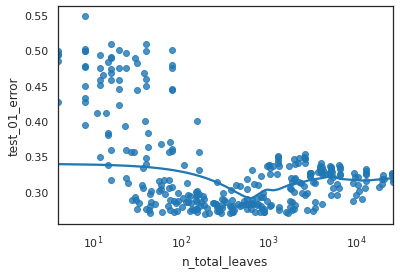

In [24]:
sns.set_style('white')
sns.set_context('notebook')
sns.regplot(data=df, x='n_total_leaves', y='test_01_error', lowess=True)
plt.xscale('log')
plt.show()

## Plot all, colored by generalization gap

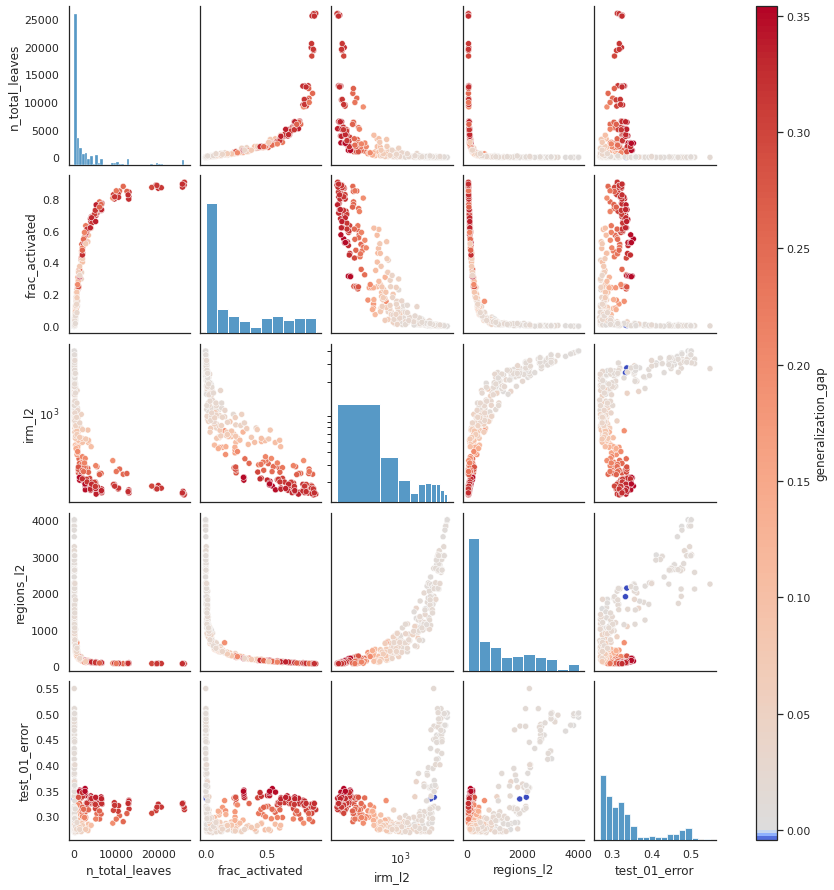

In [28]:
sns.set_context('notebook')
hue = 'generalization_gap'
variables = [
    # 'n_estimators', 'max_depth',
    'n_total_leaves', 'frac_activated', 'irm_l2', 'regions_l2',
    # 'train_01_error', 
    'test_01_error',
]
g = continuous_pairplot(
    df, vars=variables,
    hue=hue,
)
g.axes[2, 0].set_yscale('log')
g.axes[0, 2].set_xscale('log')
plt.savefig('./figures/rf_continuous_pairplot.pdf')
plt.show()

## Dynamics of complexity measures

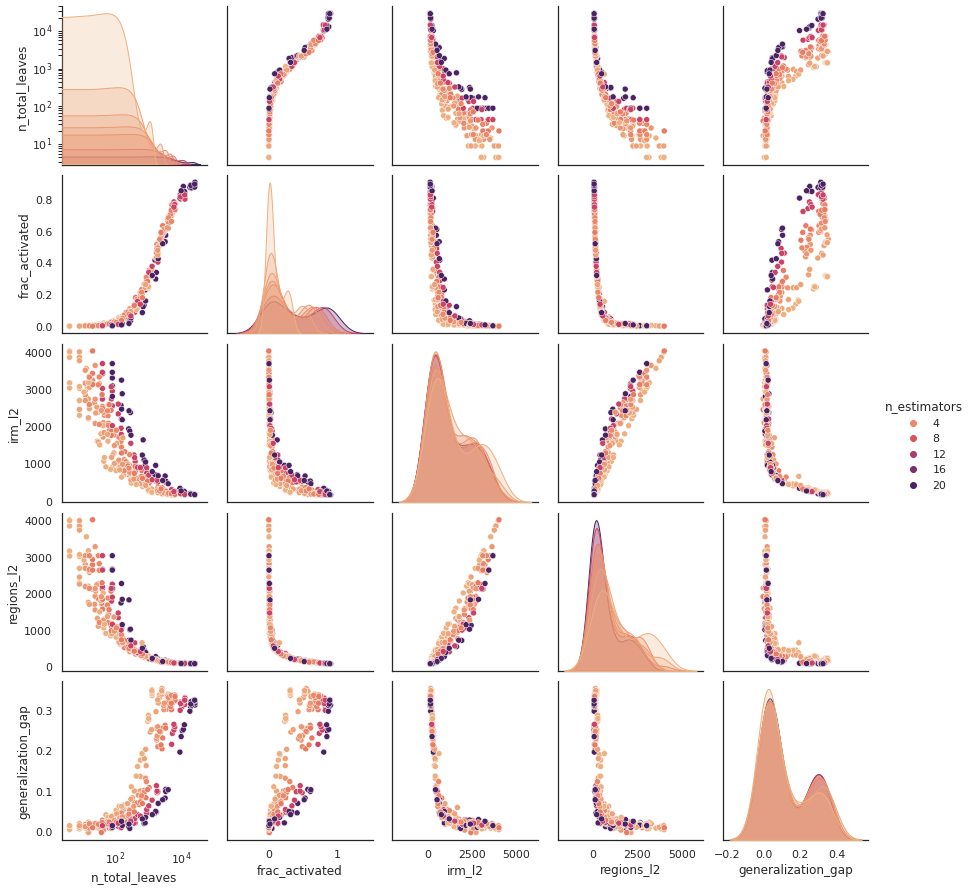

In [29]:
hue = 'n_estimators'
variables = [
    'n_total_leaves', 'frac_activated', 'irm_l2', 'regions_l2',
    'generalization_gap',
    # 'max_depth',
    # 'train_01_error', 'test_01_error'
]
g = sns.pairplot(
    df, vars=variables,
    hue=hue,
    palette='flare',
)
g.axes[0, 0].set_yscale('log')
g.axes[0, 0].set_xscale('log')
plt.savefig('./figures/rf_discrete_pairplot.pdf')
plt.show()

# Network

In [116]:
# Read
df = pd.read_csv('./results/xor_network_results.csv')

In [117]:
# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df['test_01_error'] - df['train_01_error']
df['frac_activated_pen'] = df['activated_regions_pen'] / df['n_train_samples']
df['frac_activated_all'] = df['activated_regions_all'] / df['n_train_samples']

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'hidden_layer_dims'],
#     as_index=False
# ).mean()

In [118]:
df.head(5)

,model,rep,n_train_samples,hidden_layer_dims,n_epochs,learning_rate,batch_size,verbose,train_01_error,test_01_error,...,regions_l2_pen,irm_l2_all,activated_regions_all,regions_l2_all,n_parameters,depth,width,generalization_gap,frac_activated_pen,frac_activated_all
0,network,0.0,500.0,100;100;100,0.0,0.01,128.0,0.0,0.480,0.4860,...,37.496667,207.772028,440.0,25.495098,20702.0,3.0,100.0,0.0060,0.574,0.880
1,network,0.0,500.0,100;100;100,1.0,0.01,128.0,0.0,0.386,0.3906,...,40.963398,176.089140,461.0,24.166092,20702.0,3.0,100.0,0.0046,0.564,0.922
2,network,0.0,500.0,100;100;100,2.0,0.01,128.0,0.0,0.302,0.3013,...,38.961519,144.772622,472.0,23.748684,20702.0,3.0,100.0,-0.0007,0.584,0.944
3,network,0.0,500.0,100;100;100,4.0,0.01,128.0,0.0,0.284,0.2753,...,45.387223,117.972407,465.0,24.041631,20702.0,3.0,100.0,-0.0087,0.576,0.930
4,network,0.0,500.0,100;100;100,8.0,0.01,128.0,0.0,0.262,0.2712,...,46.432747,119.639563,461.0,24.494897,20702.0,3.0,100.0,0.0092,0.532,0.922


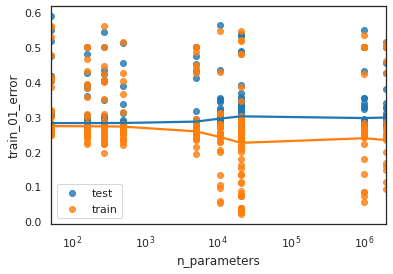

In [119]:
sns.set_style('white')
sns.set_context('notebook')

fig, ax = plt.subplots(1, 1, sharex=True)

sns.regplot(data=df, x='n_parameters', y='test_01_error', lowess=True, ax=ax, label='test')
sns.regplot(data=df, x='n_parameters', y='train_01_error', lowess=True, ax=ax, label='train')
plt.xscale('log')
plt.legend()
plt.show()

In [104]:
corr_vars = [
    'n_parameters', 'depth', 'width',
    'frac_activated_pen', 'irm_l2_pen', 'regions_l2_pen',
    'frac_activated_all', 'irm_l2_all', 'regions_l2_all',
    'generalization_gap', 'n_epochs',
]
corr_df = df[corr_vars].corr('spearman')
display(corr_df)
# corr_df.to_csv('./results/dn_spearman_corrs.csv')

,n_parameters,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
n_parameters,1.000000,0.534983,0.796805,0.595120,-0.699138,-0.540713,0.945967,-0.519013,-0.942637,0.289580,-0.009369
depth,0.534983,1.000000,-0.004821,0.025798,-0.671974,0.045672,0.471031,-0.392980,-0.473452,0.288945,-0.006260
width,0.796805,-0.004821,1.000000,0.753234,-0.312056,-0.729261,0.808558,-0.270426,-0.800266,0.123450,-0.007830
frac_activated_pen,0.595120,0.025798,0.753234,1.000000,-0.143436,-0.977934,0.700145,-0.184227,-0.697469,0.172763,-0.018163
irm_l2_pen,-0.699138,-0.671974,-0.312056,-0.143436,1.000000,0.072036,-0.594620,0.856678,0.588670,-0.569560,-0.341354
regions_l2_pen,-0.540713,0.045672,-0.729261,-0.977934,0.072036,1.000000,-0.652912,0.121627,0.655245,-0.123515,0.046950
frac_activated_all,0.945967,0.471031,0.808558,0.700145,-0.594620,-0.652912,1.000000,-0.425054,-0.996208,0.229381,-0.066942
irm_l2_all,-0.519013,-0.392980,-0.270426,-0.184227,0.856678,0.121627,-0.425054,1.000000,0.418331,-0.625341,-0.513636
regions_l2_all,-0.942637,-0.473452,-0.800266,-0.697469,0.588670,0.655245,-0.996208,0.418331,1.000000,-0.219676,0.081144
generalization_gap,0.289580,0.288945,0.123450,0.172763,-0.569560,-0.123515,0.229381,-0.625341,-0.219676,1.000000,0.760635


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

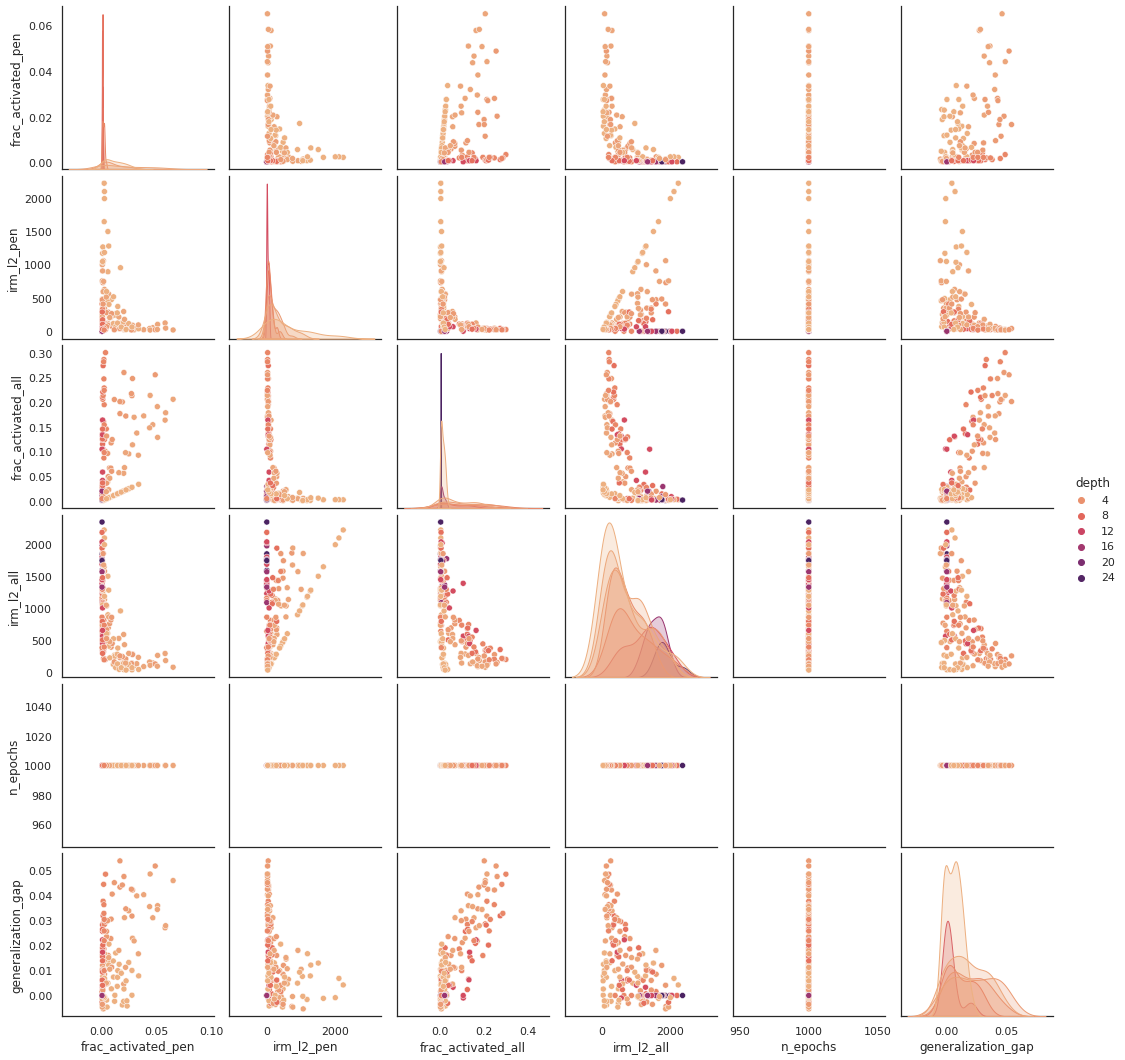

In [99]:
hue = 'depth'
variables = [
    # 'n_parameters', # 'depth', 'width',
    'frac_activated_pen', 'irm_l2_pen', # 'regions_l2_pen',
    'frac_activated_all', 'irm_l2_all', # 'regions_l2_all',
    # 'train_01_error', 'test_01_error',
    'n_epochs',
    'generalization_gap',
]
# df_plot = df[variables + [hue]]
# df_plot[hue] = np.log(df_plot[hue])
g = sns.pairplot(
    df, vars=variables,
    hue=hue, palette='flare',
)
# for axis in [0]:
#     g.axes[axis, 0].set_yscale('log')
#     g.axes[0, axis].set_xscale('log')
plt.show()

20702.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


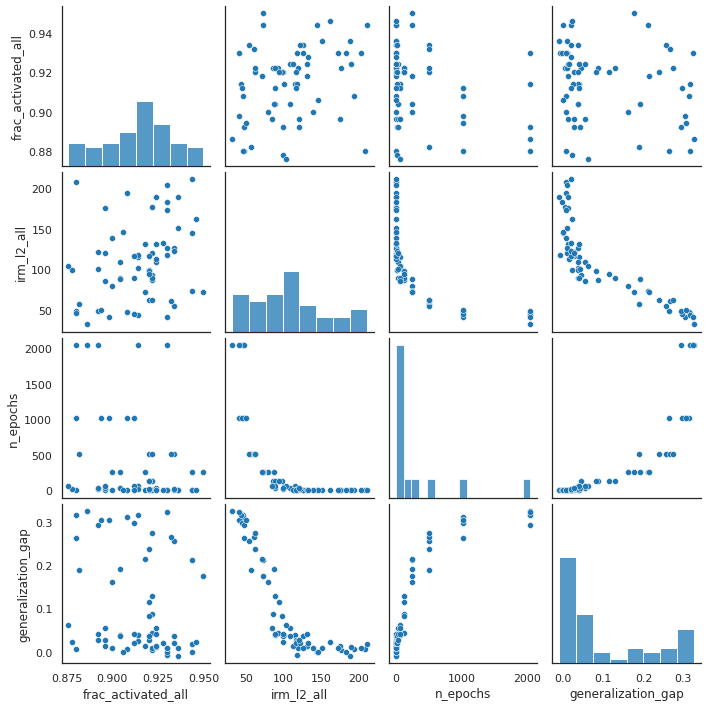

1006002.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


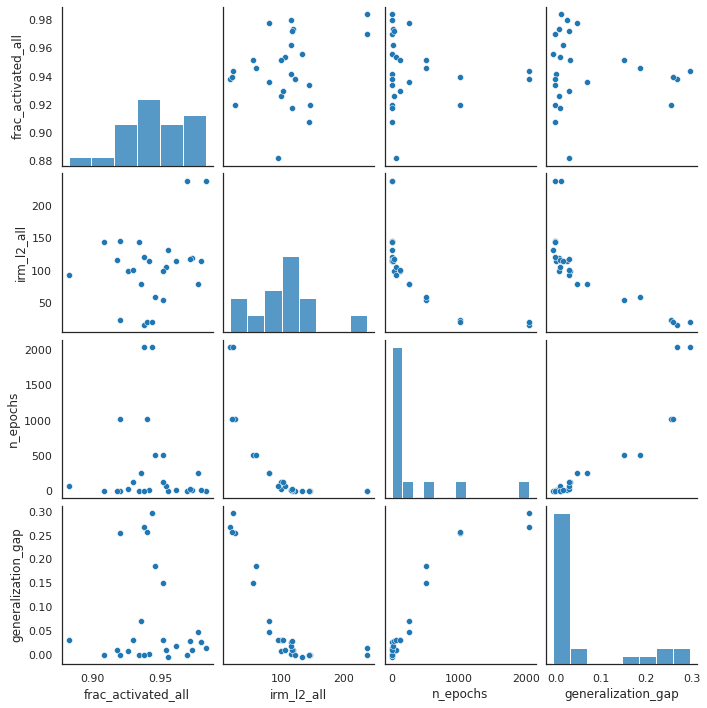

52.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


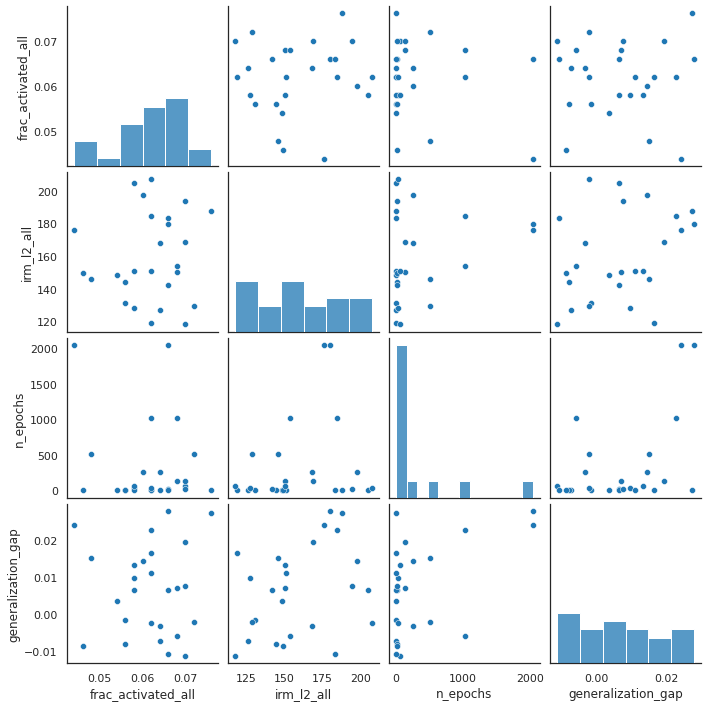

162.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


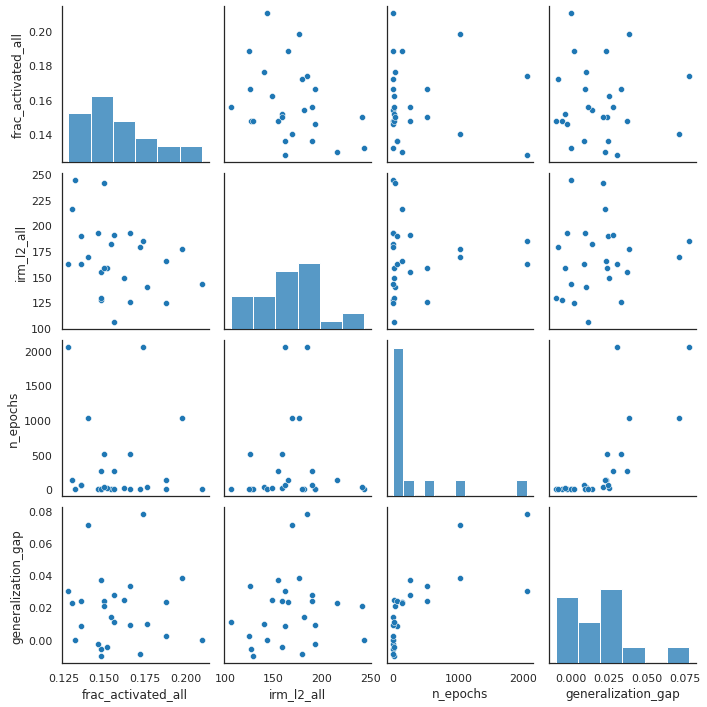

272.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


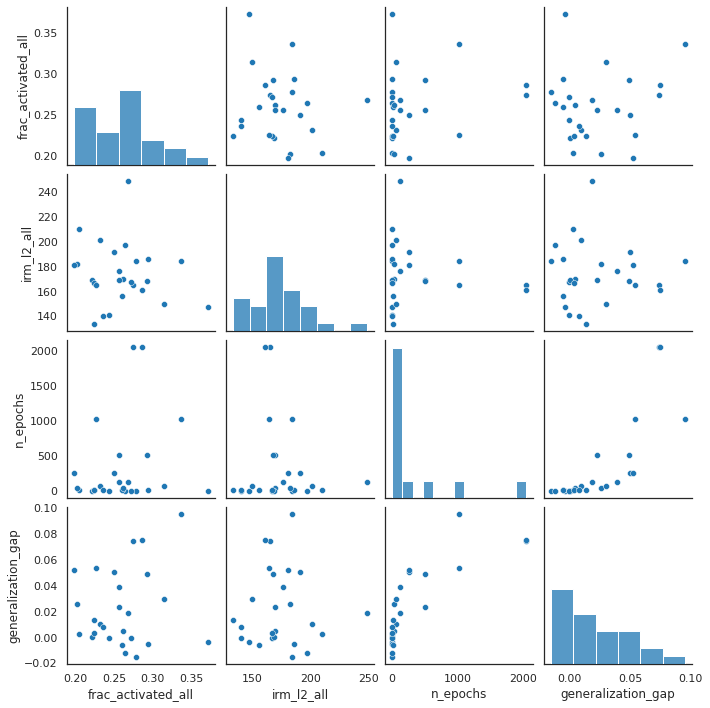

502.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


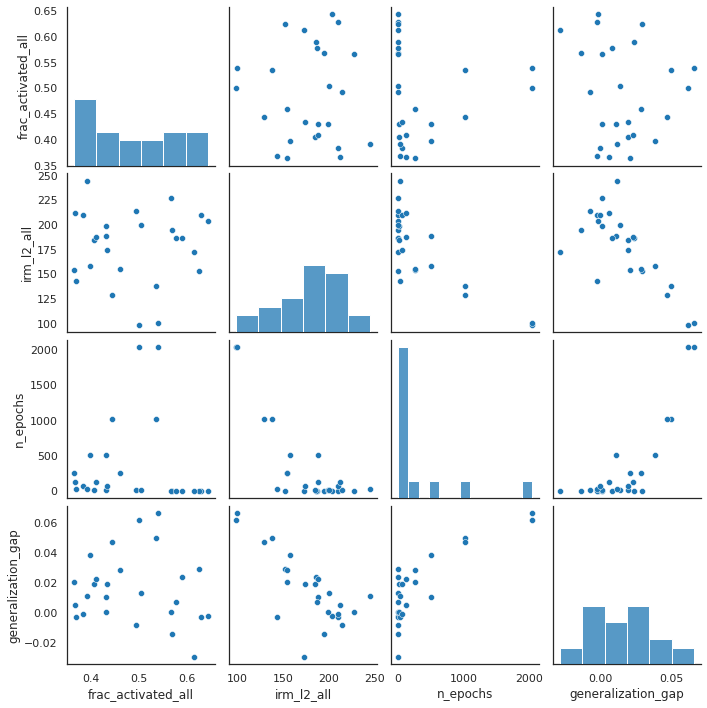

10602.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


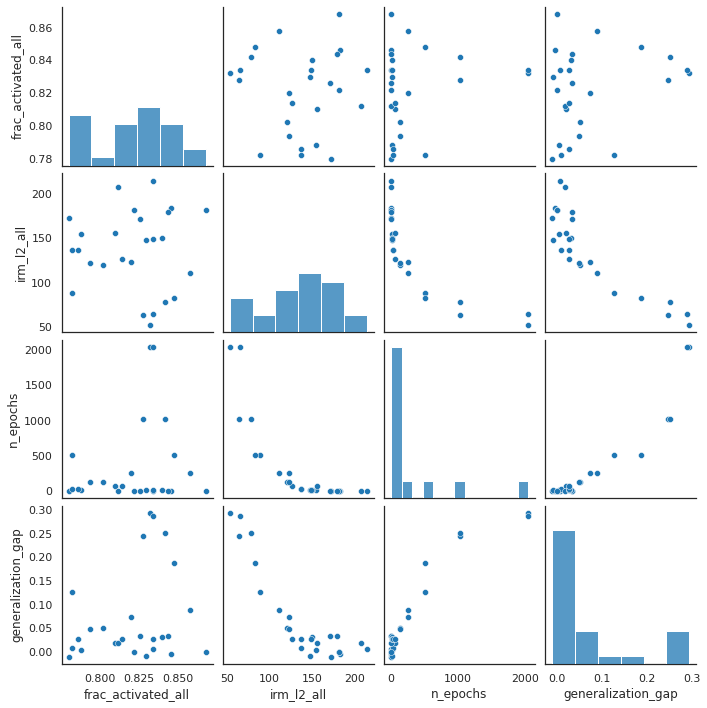

5002.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


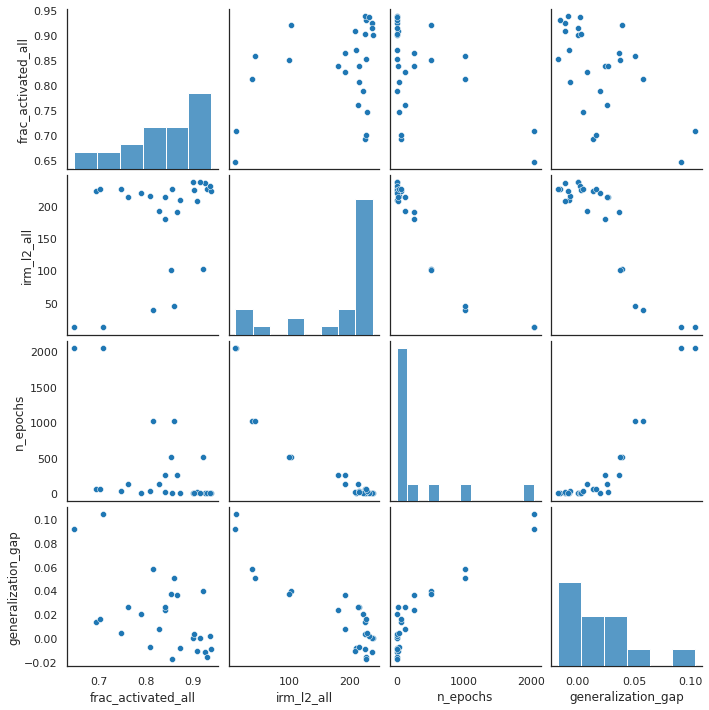

2007002.0


,depth,width,frac_activated_pen,irm_l2_pen,regions_l2_pen,frac_activated_all,irm_l2_all,regions_l2_all,generalization_gap,n_epochs
depth,1.000000,0.000000,0.024000,-0.673227,0.046989,0.472747,-0.396300,-0.475031,0.292880,0.000000
width,0.000000,1.000000,0.747417,-0.317522,-0.723617,0.808952,-0.276202,-0.800224,0.129133,0.000000
frac_activated_pen,0.024000,0.747417,1.000000,-0.139564,-0.978156,0.695956,-0.180185,-0.693792,0.170303,-0.021144
irm_l2_pen,-0.673227,-0.317522,-0.139564,1.000000,0.068834,-0.596899,0.858196,0.590347,-0.573821,-0.348062
regions_l2_pen,0.046989,-0.723617,-0.978156,0.068834,1.000000,-0.649105,0.118154,0.651932,-0.121331,0.049820
frac_activated_all,0.472747,0.808952,0.695956,-0.596899,-0.649105,1.000000,-0.428390,-0.996206,0.233563,-0.060134
irm_l2_all,-0.396300,-0.276202,-0.180185,0.858196,0.118154,-0.428390,1.000000,0.421039,-0.629116,-0.518584
regions_l2_all,-0.475031,-0.800224,-0.693792,0.590347,0.651932,-0.996206,0.421039,1.000000,-0.223206,0.075120
generalization_gap,0.292880,0.129133,0.170303,-0.573821,-0.121331,0.233563,-0.629116,-0.223206,1.000000,0.762768
n_epochs,0.000000,0.000000,-0.021144,-0.348062,0.049820,-0.060134,-0.518584,0.075120,0.762768,1.000000


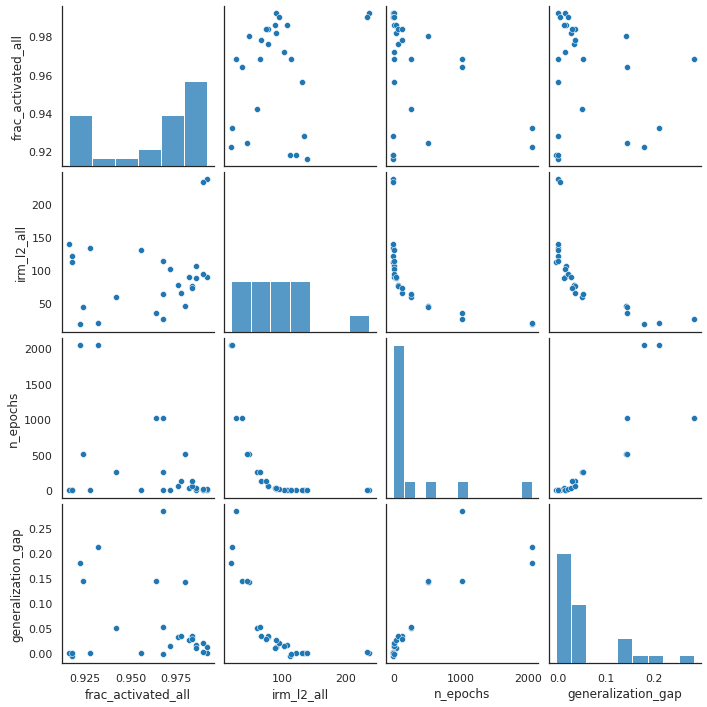

In [126]:
hue = 'n_parameters'
variables = [
    # 'n_parameters', # 'depth', 'width',
    # 'frac_activated_pen', 'irm_l2_pen', # 'regions_l2_pen',
    'frac_activated_all', 'irm_l2_all', # 'regions_l2_all',
    # 'train_01_error', 'test_01_error',
    'n_epochs',
    'generalization_gap',
]

for val in df[hue].unique():
    print(val)
    corr_vars = [
        'n_parameters', 'depth', 'width',
        'frac_activated_pen', 'irm_l2_pen', 'regions_l2_pen',
        'frac_activated_all', 'irm_l2_all', 'regions_l2_all',
        'generalization_gap', 'n_epochs',
    ]
    corr_df = df[corr_vars].corr('spearman')
    display(corr_df)
    g = sns.pairplot(
        df[df[hue] == val], vars=variables,
        # hue=hue,
        # palette='flare',
    )
#     for axis in [1, 3]:
#         g.axes[axis, 0].set_yscale('log')
#         g.axes[0, axis].set_xscale('log')
    # plt.savefig('./figures/dn_discrete_pairplot.pdf')
    plt.show()

In [115]:
df[['n_parameters','hidden_layer_dims']].drop_duplicates()

,n_parameters,hidden_layer_dims
0,20702.0,100;100;100
65,1006002.0,1000;1000
91,52.0,10
104,162.0,10;10
117,272.0,10;10;10
130,502.0,100
143,10602.0,100;100
156,5002.0,1000
169,2007002.0,1000;1000;1000
